In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from classy import Class
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from matplotlib import ticker, cm

In [2]:
Avals = np.array([1e-6,1e-5,1e-4,1e-3,1e-7,1e-8])
#Avals = np.logspace(-8,-3,100)
Mvals = np.array([10, 100,200, 500, 1000, 2000, 5000])
#Mvals = np.logspace(1,4,50)

Avals.sort()
Mvals.sort()

models = set()
moddata = {}
cosmo = {}

for M in Mvals:
    for A in Avals:
        model = 'M=' + str(M) + '-A=' + str(A)
        models.add(model)
        moddata[model]={'Mass':M,'A':A}
        cosmo[model]=Class()
        cosmo[model].set({'gauge':'synchronous',
                               'omega_cdm':0.12038,
                               'recombination':'recfast',
                               'h':0.67556,
                               'f_bidm':0.99,
                               'm_bidm':M,
                               'bidm_type':'resonance',
                               #'a_bidm':1e-8,
                               'epsilon_bidm':3e-11,
                               'A_bidm':A,
                               'tight_coupling_trigger_tau_c_over_tau_h':0.002,
                               'tight_coupling_trigger_tau_c_over_tau_k':0.0003,
                               })
        print(model)
        cosmo[model].compute()

M=10-A=1e-08
M=10-A=1e-07
M=10-A=1e-06
M=10-A=1e-05
M=10-A=0.0001
M=10-A=0.001
M=100-A=1e-08
M=100-A=1e-07
M=100-A=1e-06
M=100-A=1e-05
M=100-A=0.0001
M=100-A=0.001
M=200-A=1e-08
M=200-A=1e-07
M=200-A=1e-06
M=200-A=1e-05
M=200-A=0.0001
M=200-A=0.001
M=500-A=1e-08
M=500-A=1e-07
M=500-A=1e-06
M=500-A=1e-05
M=500-A=0.0001
M=500-A=0.001
M=1000-A=1e-08
M=1000-A=1e-07
M=1000-A=1e-06
M=1000-A=1e-05
M=1000-A=0.0001
M=1000-A=0.001
M=2000-A=1e-08
M=2000-A=1e-07
M=2000-A=1e-06
M=2000-A=1e-05
M=2000-A=0.0001
M=2000-A=0.001
M=5000-A=1e-08
M=5000-A=1e-07
M=5000-A=1e-06
M=5000-A=1e-05
M=5000-A=0.0001
M=5000-A=0.001


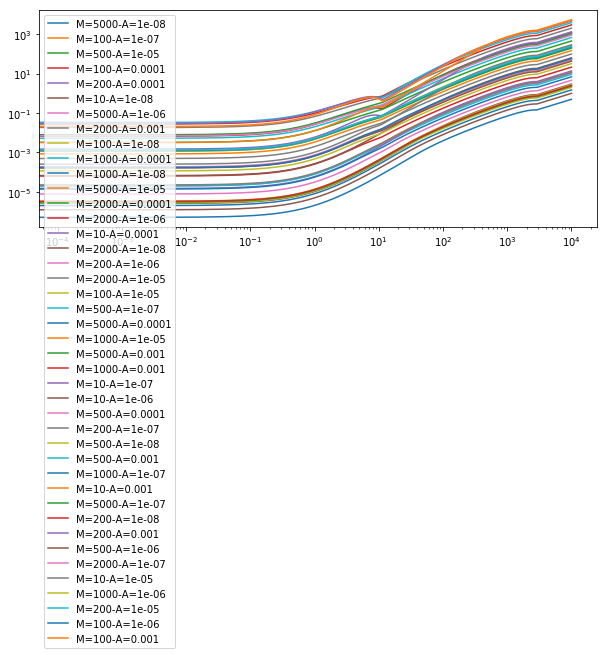

In [3]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for m in models:
    Th = cosmo[m].get_thermodynamics()
    ax.loglog(Th['z'],Th['Tbidm [K]'],label=m)
ax.legend()

In [4]:
for m in models:
    Th = cosmo[m].get_thermodynamics()
    Tmax = max(Th['Tbidm [K]'])
    iTmax = np.argmax(Th['Tbidm [K]'])
    zeq = Th['z'][iTmax]
    Ti = interp1d(Th['z'],Th['Tbidm [K]'])
    Tbi = interp1d(Th['z'],Th['Tb [K]'])
    #print(str(A) + ' ' + str(max(Th['z'])))
    Teq = Ti(zeq)
    aeq = Ti(zeq)/Tbi(zeq)
    moddata[m].update({'Teq':Teq,'aeq':aeq,'zeq':zeq})

In [196]:
moddata

{'M=10-A=1e-08': {'Mass': 10,
  'A': 1e-08,
  'Teq': array(0.55011735),
  'aeq': 0.00010764851253241718,
  'zeq': 1874.0},
 'M=10-A=1e-07': {'Mass': 10,
  'A': 1e-07,
  'Teq': array(2.55635117),
  'aeq': 0.0005001006337104366,
  'zeq': 1874.5},
 'M=10-A=1e-06': {'Mass': 10,
  'A': 1e-06,
  'Teq': array(11.86047223),
  'aeq': 0.0023196534440287136,
  'zeq': 1875.0},
 'M=10-A=1e-05': {'Mass': 10,
  'A': 1e-05,
  'Teq': array(54.85327567),
  'aeq': 0.01071099324504042,
  'zeq': 1878.0},
 'M=10-A=0.0001': {'Mass': 10,
  'A': 0.0001,
  'Teq': array(250.22132276),
  'aeq': 0.0485112405736323,
  'zeq': 1891.5},
 'M=10-A=0.001': {'Mass': 10,
  'A': 0.001,
  'Teq': array(1072.4928084),
  'aeq': 0.20164142981379707,
  'zeq': 1950.5},
 'M=100-A=1e-08': {'Mass': 100,
  'A': 1e-08,
  'Teq': array(0.50587896),
  'aeq': 9.896542818093423e-05,
  'zeq': 1874.5},
 'M=100-A=1e-07': {'Mass': 100,
  'A': 1e-07,
  'Teq': array(2.34846892),
  'aeq': 0.000459432493094421,
  'zeq': 1874.5},
 'M=100-A=1e-06': {

In [5]:
Msorted = {}
for M in Mvals:
    Msorted[str(M)]={'A':list(),'aeq':list()}

for M in Mvals:
    for m in models:
        if moddata[m]['Mass']==M:
            Msorted[str(M)]['A']+=[moddata[m]['A']]
            Msorted[str(M)]['aeq']+=[moddata[m]['aeq']]
    

In [6]:
Msorted

{'10': {'A': [1e-05, 0.001, 0.0001, 1e-08, 1e-06, 1e-07],
  'aeq': [0.01071099324504042,
   0.20164142981379707,
   0.0485112405736323,
   0.00010764851253241718,
   0.0023196534440287136,
   0.0005001006337104366]},
 '100': {'A': [1e-06, 0.001, 0.0001, 1e-07, 1e-08, 1e-05],
  'aeq': [0.0021299953125289563,
   0.18759400575529295,
   0.0446857905398314,
   0.000459432493094421,
   9.896542818093423e-05,
   0.009840851203514842]},
 '200': {'A': [1e-06, 0.001, 1e-08, 1e-05, 0.0001, 1e-07],
  'aeq': [0.001952770879858212,
   0.17383264305964224,
   9.072759772701078e-05,
   0.00902573052253197,
   0.04106641218753795,
   0.0004210587994501749]},
 '500': {'A': [1e-08, 0.001, 0.0001, 1e-07, 1e-06, 1e-05],
  'aeq': [7.258525542628903e-05,
   0.1423747135435776,
   0.03302225449636527,
   0.0003369497185378794,
   0.0015628693105778776,
   0.007229766126536833]},
 '1000': {'A': [1e-05, 1e-06, 1e-07, 0.0001, 0.001, 1e-08],
  'aeq': [0.0054282030936322395,
   0.001172254556302244,
   0.00025271

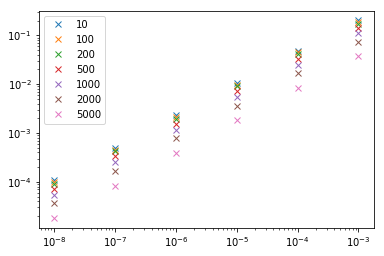

In [7]:
for M in Mvals:
    plt.loglog(Msorted[str(M)]['A'],Msorted[str(M)]['aeq'],'x',label=str(M))
plt.legend()

In [8]:
Asorted = {}
for A in Avals:
    Asorted[str(A)]={'Mass':list(),'aeq':list()}

for A in Avals:
    for m in models:
        if moddata[m]['A']==A:
            Asorted[str(A)]['Mass']+=[moddata[m]['Mass']]
            Asorted[str(A)]['aeq']+=[moddata[m]['aeq']]

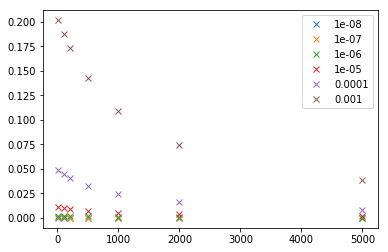

In [9]:
for A in Avals:
    plt.plot(Asorted[str(A)]['Mass'],Asorted[str(A)]['aeq'],'x',label=str(A))
plt.legend()

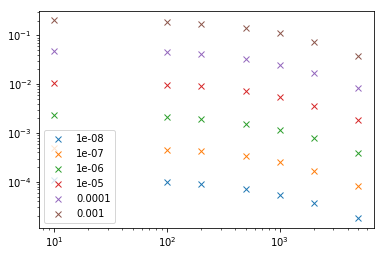

In [10]:
for A in Avals:
    plt.loglog(Asorted[str(A)]['Mass'],Asorted[str(A)]['aeq'],'x',label=str(A))
plt.legend()

In [11]:
AA, MM = np.meshgrid(Avals,Mvals)
aa = np.zeros(AA.shape)

for iA in range(0,aa.shape[1]):
    for iM in range(0,aa.shape[0]):
        for m in models:
            if AA[iM,iA] == moddata[m]['A'] and MM[iM,iA] == moddata[m]['Mass']:
                aa[iM,iA] = moddata[m]['aeq']

In [12]:
nums100 = np.linspace(1,100,100)
nums10 = np.linspace(1,100,10)

XX, YY = np.meshgrid(nums100,nums10)

In [64]:
XX.shape
YY.shape

(10, 100)

In [66]:
YY.shape[0]

10

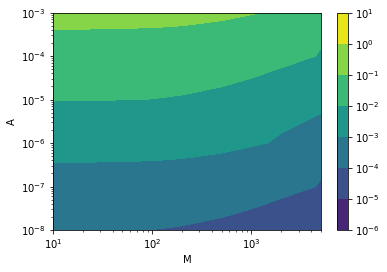

In [13]:
plt.contourf(MM,AA,aa,locator=ticker.LogLocator())
plt.xlabel('M')
plt.ylabel('A')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()

0.0001

In [148]:
aa

[0.01071099324504042,
 0.20164142981379707,
 0.0485112405736323,
 0.0023196534440287136,
 0.00010764851253241718,
 0.0005001006337104366,
 0.18759400575529295,
 0.000459432493094421,
 0.009840851203514842,
 9.896542818093423e-05,
 0.0446857905398314,
 0.0021299953125289563,
 0.00902573052253197,
 0.001952770879858212,
 9.072759772701078e-05,
 0.04106641218753795,
 0.17383264305964224,
 0.0004210587994501749,
 0.0015628693105778776,
 0.1423747135435776,
 7.258525542628903e-05,
 0.03302225449636527,
 0.007229766126536833,
 0.0003369497185378794,
 0.0054282030936322395,
 0.024892869510657736,
 0.00025271286473160554,
 0.001172254556302244,
 5.4437432706412124e-05,
 0.10930750878503005,
 0.0007817535753326057,
 0.07460875181691581,
 0.016679859636207106,
 0.003622408723799059,
 0.00016847044480503364,
 3.628748427550339e-05,
 1.8138885807902474e-05,
 8.422287420532187e-05,
 0.008382705124020187,
 0.00039098086742207235,
 0.0018133366543361164,
 0.03819441015251926]

In [18]:
aa = []
Arep = []
Mrep = []

for M in Mvals:
    aa += Msorted[str(M)]['aeq']
    Arep += Msorted[str(M)]['A']
    for i in range(0,len(Msorted[str(M)]['A'])):
        Mrep += [M]
    #print(M)
    #print(Msorted[str(M)]['A'])
    #print(Msorted[str(M)]['aeq'])

In [16]:
np.log10(10)

1.0

In [19]:
afunc = interp2d(np.log10(Arep),np.log10(Mrep),np.log10(aa))

In [20]:
Mspace = np.logspace(1,3.69,1000)
Aspace = np.logspace(-8,-3,1000)

AAspace, MMspace = np.meshgrid(Aspace,Mspace)

aaspace = np.zeros(MMspace.shape)

for iA in range(0,aaspace.shape[1]):
    for iM in range(0,aaspace.shape[0]):
        aaspace[iM,iA] = afunc(np.log10(AAspace[iM,iA]),np.log10(MMspace[iM,iA]))



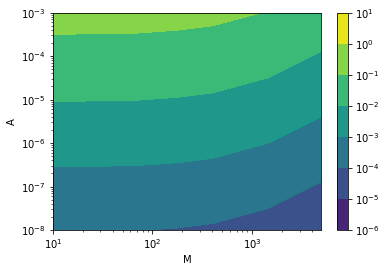

In [21]:
plt.contourf(MMspace,AAspace,10**aaspace,locator=ticker.LogLocator())
plt.xlabel('M')
plt.ylabel('A')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()

In [203]:
models

{'M=10-A=0.0001',
 'M=10-A=0.001',
 'M=10-A=1e-05',
 'M=10-A=1e-06',
 'M=10-A=1e-07',
 'M=10-A=1e-08',
 'M=100-A=0.0001',
 'M=100-A=0.001',
 'M=100-A=1e-05',
 'M=100-A=1e-06',
 'M=100-A=1e-07',
 'M=100-A=1e-08',
 'M=1000-A=0.0001',
 'M=1000-A=0.001',
 'M=1000-A=1e-05',
 'M=1000-A=1e-06',
 'M=1000-A=1e-07',
 'M=1000-A=1e-08',
 'M=200-A=0.0001',
 'M=200-A=0.001',
 'M=200-A=1e-05',
 'M=200-A=1e-06',
 'M=200-A=1e-07',
 'M=200-A=1e-08',
 'M=2000-A=0.0001',
 'M=2000-A=0.001',
 'M=2000-A=1e-05',
 'M=2000-A=1e-06',
 'M=2000-A=1e-07',
 'M=2000-A=1e-08',
 'M=500-A=0.0001',
 'M=500-A=0.001',
 'M=500-A=1e-05',
 'M=500-A=1e-06',
 'M=500-A=1e-07',
 'M=500-A=1e-08',
 'M=5000-A=0.0001',
 'M=5000-A=0.001',
 'M=5000-A=1e-05',
 'M=5000-A=1e-06',
 'M=5000-A=1e-07',
 'M=5000-A=1e-08'}

In [159]:
Mvals.shape

(7,)

In [160]:
Avals.shape

(6,)

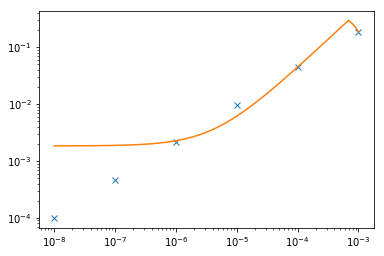

In [219]:
plt.loglog(Msorted['100']['A'],Msorted['100']['aeq'],'x',label='CLASS')
plt.loglog(Aspace,afunc(Aspace,100))

In [169]:
aa

[[0.01071099324504042,
  0.20164142981379707,
  0.0485112405736323,
  0.0023196534440287136,
  0.00010764851253241718,
  0.0005001006337104366],
 [0.18759400575529295,
  0.000459432493094421,
  0.009840851203514842,
  9.896542818093423e-05,
  0.0446857905398314,
  0.0021299953125289563],
 [0.00902573052253197,
  0.001952770879858212,
  9.072759772701078e-05,
  0.04106641218753795,
  0.17383264305964224,
  0.0004210587994501749],
 [0.0015628693105778776,
  0.1423747135435776,
  7.258525542628903e-05,
  0.03302225449636527,
  0.007229766126536833,
  0.0003369497185378794],
 [0.0054282030936322395,
  0.024892869510657736,
  0.00025271286473160554,
  0.001172254556302244,
  5.4437432706412124e-05,
  0.10930750878503005],
 [0.0007817535753326057,
  0.07460875181691581,
  0.016679859636207106,
  0.003622408723799059,
  0.00016847044480503364,
  3.628748427550339e-05],
 [1.8138885807902474e-05,
  8.422287420532187e-05,
  0.008382705124020187,
  0.00039098086742207235,
  0.0018133366543361164,

In [170]:
z = [[1,2,3], [4,5,6]]

In [172]:
np.shape(z)

(2, 3)

In [22]:
np.logspace(-8,-3,100)

array([1.00000000e-08, 1.12332403e-08, 1.26185688e-08, 1.41747416e-08,
       1.59228279e-08, 1.78864953e-08, 2.00923300e-08, 2.25701972e-08,
       2.53536449e-08, 2.84803587e-08, 3.19926714e-08, 3.59381366e-08,
       4.03701726e-08, 4.53487851e-08, 5.09413801e-08, 5.72236766e-08,
       6.42807312e-08, 7.22080902e-08, 8.11130831e-08, 9.11162756e-08,
       1.02353102e-07, 1.14975700e-07, 1.29154967e-07, 1.45082878e-07,
       1.62975083e-07, 1.83073828e-07, 2.05651231e-07, 2.31012970e-07,
       2.59502421e-07, 2.91505306e-07, 3.27454916e-07, 3.67837977e-07,
       4.13201240e-07, 4.64158883e-07, 5.21400829e-07, 5.85702082e-07,
       6.57933225e-07, 7.39072203e-07, 8.30217568e-07, 9.32603347e-07,
       1.04761575e-06, 1.17681195e-06, 1.32194115e-06, 1.48496826e-06,
       1.66810054e-06, 1.87381742e-06, 2.10490414e-06, 2.36448941e-06,
       2.65608778e-06, 2.98364724e-06, 3.35160265e-06, 3.76493581e-06,
       4.22924287e-06, 4.75081016e-06, 5.33669923e-06, 5.99484250e-06,
      